In [1]:
# Imports
import random
import string
import tempfile
import shutil
import subprocess as sp
import os

from PIL import Image
from torch import nn as nn
from torch import Generator
from torch.utils.data import random_split,DataLoader
# TODO: Currently assumes that pytest runs from project root
from util.car_dataset import check_dir, check_file, CarDataset, DatasetError
from networks.common import *
from networks.CNNbase import CNNBasic

In [2]:
# Helper Functions
def rand_string(length=5):
    return ''.join(random.choices(string.ascii_letters +
        string.digits, k=length))

def loaded_dataset(temp_dir):
    '''
    Loads the car_dataset and returns the CarDataset object.
    '''
    image_folder_list = ['0_Frames','1_Frames','2_Frames','3_Frames']
    label_file_list = ['0.txt','1.txt','2.txt','3.txt']
    #image_folder_list = ['0_Frames']
    #label_file_list = ['0.txt']
    car_data = CarDataset(temp_dir,image_folder_list,label_file_list)
    car_data.drop_nan()

    return car_data

def dataset_loader(loaded_dataset):
    length = len(loaded_dataset)
    split_set = random_split(loaded_dataset,[round(0.80*length)
                ,round(0.20*length)],generator=Generator().manual_seed(42))
    train_loader = DataLoader(split_set[0],batch_size=20)
    test_loader = DataLoader(split_set[1],batch_size=20)
    '''
    Lowering values to sane levels to help run tests on github
    runners. Ideally on local GPU (4GB) 80/20 split with batch size of
    30 works well.
    '''
    return (train_loader,test_loader)

def network(alpha=0):
    network = CNNBasic(alpha)
    network = network.to(get_device())
    network.double()
    return network

In [3]:
root = os.getcwd()
print(os.getcwd())

/home/akshay.viswakumar/dl-based-sensor-calib


In [4]:
# Load Data
data = loaded_dataset(os.path.join(root,"dummy"))

In [5]:
# Split Dataset
datasets = dataset_loader(data)

In [6]:
# Initialize Network
net = network(alpha=0)

In [7]:
# Set Up Paths and Metadata for Storing Values
test_name = "Baseline"
checkpoint_path = os.path.join(root,"Test-Results",test_name)

In [8]:
# Train
train = datasets[0]
test = datasets[1]
print("Start Training")
losses = run_training(net,train,test,21,get_device(),checkpoint_path,test_name,checkpoint_freq=5)

0it [00:00, ?it/s]

Start Training


149it [04:56,  1.99s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000088
Train Epoch: 0	Train Loss: 0.000457 Test Loss:0.000088


149it [05:06,  2.06s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000075
Train Epoch: 1	Train Loss: 0.000242 Test Loss:0.000075


149it [05:03,  2.04s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000074
Train Epoch: 2	Train Loss: 0.000199 Test Loss:0.000074


149it [05:00,  2.02s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000073
Train Epoch: 3	Train Loss: 0.000173 Test Loss:0.000073


149it [05:04,  2.04s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000068
Train Epoch: 4	Train Loss: 0.000162 Test Loss:0.000068


149it [05:01,  2.03s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000062
Train Epoch: 5	Train Loss: 0.000153 Test Loss:0.000062


149it [04:58,  2.00s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000058
Train Epoch: 6	Train Loss: 0.000141 Test Loss:0.000058


149it [05:05,  2.05s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000055
Train Epoch: 7	Train Loss: 0.000132 Test Loss:0.000055


149it [05:04,  2.04s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000054
Train Epoch: 8	Train Loss: 0.000128 Test Loss:0.000054


149it [03:43,  1.50s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000056
Train Epoch: 9	Train Loss: 0.000122 Test Loss:0.000056


149it [03:20,  1.35s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000049
Train Epoch: 10	Train Loss: 0.000115 Test Loss:0.000049


149it [03:40,  1.48s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000050
Train Epoch: 11	Train Loss: 0.000113 Test Loss:0.000050


149it [03:37,  1.46s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000049
Train Epoch: 12	Train Loss: 0.000109 Test Loss:0.000049


149it [03:19,  1.34s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000045
Train Epoch: 13	Train Loss: 0.000100 Test Loss:0.000045


149it [03:14,  1.30s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000043
Train Epoch: 14	Train Loss: 0.000100 Test Loss:0.000043


149it [03:14,  1.31s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000042
Train Epoch: 15	Train Loss: 0.000093 Test Loss:0.000042


149it [03:15,  1.31s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000042
Train Epoch: 16	Train Loss: 0.000096 Test Loss:0.000042


149it [03:16,  1.32s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000040
Train Epoch: 17	Train Loss: 0.000096 Test Loss:0.000040


149it [03:41,  1.48s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000039
Train Epoch: 18	Train Loss: 0.000092 Test Loss:0.000039


149it [03:41,  1.49s/it]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000037
Train Epoch: 19	Train Loss: 0.000088 Test Loss:0.000037


149it [03:19,  1.34s/it]


Num = 38
Len = 742
Test Set Average Loss 0.000038
Train Epoch: 20	Train Loss: 0.000090 Test Loss:0.000038


In [9]:
# Save Loss Files
save_stats(losses[0],os.path.join(checkpoint_path,'train_loss.pkl')) # Train loss
save_stats(losses[1],os.path.join(checkpoint_path,'test_loss.pkl')) # Test Loss

In [10]:
import matplotlib.pyplot as plt

def plot_losses(test,train):
    plt.figure()
    plt.grid()
    plt.plot(train,label='train')
    plt.plot(test,label='test')
    plt.legend()

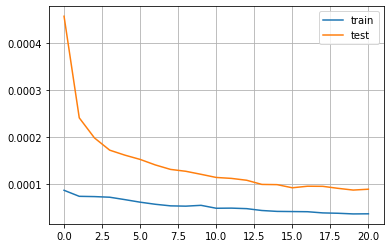

In [11]:
plot_losses(losses[0],losses[1])

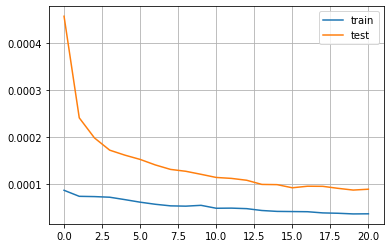

In [12]:
# Just a Backup Test
plot_losses(load_stats(os.path.join(checkpoint_path,'train_loss.pkl')),load_stats(os.path.join(checkpoint_path,'test_loss.pkl')))